<font color='red'>
Grade: A

Problem 1: Good.

Problem 2: Good.

In [1]:
#Import library

import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import scipy.io as sio
import matplotlib as mpl
from matplotlib.pylab import rcParams
from sklearn.decomposition import PCA
from matplotlib.image import imread
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
#Check Working directory location
import os
print(os.getcwd())

/Users/yaningliu/OneDrive - The University of Colorado Denver/CUDenver_Courses/MATH40275027_MachineLearning_Spring2021/Homework/StudentHW/HW6-Sec001


## Problem 1

In [4]:
#Load compute_servers data
compute = sio.loadmat("Data/compute_servers.mat")

In [5]:
#Extract feature matrix and define columns
X = compute['X']
latency = X[:,0]
throughput = X[:,1]

#### a. Make a scatter plot of the data. The first columm is latency and the second is throughput. Does it look like that there are anomalies?

Text(0, 0.5, 'Throughput (mb/s)')

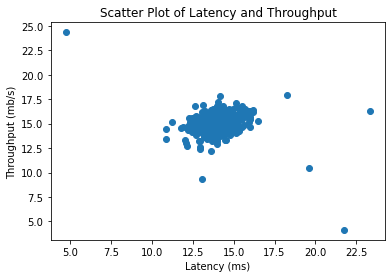

In [6]:
# Scatter Plot
plt.scatter(latency, throughput)
plt.title("Scatter Plot of Latency and Throughput")
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

Ans: From the scatter plot, we can clearly see that there appear to be some anomalies as some points are distinctly away from the cluster.

#### b. Now we will use a Gaussian mixture model to detect anomalous examples. Just by looking at the plot in Part (a), how many Gaussian distributions should be considered in the mixture model?

Ans: From the Scatter plot above, it is obvious that there is one main cluster in the data, so we can consider one Gaussian distribution in the mixture model.

#### c. Use the number of Gaussian distributions found in Part (b) to build a Gaussian mixture model for the data. Show the weight(s), mean(s) and covariance matrix (matrices) of the Gaussian distriubtion(s).

In [7]:
# Set up GM
gm = GaussianMixture(n_components=1, n_init=20, random_state=10)
gm.fit(X)

GaussianMixture(n_init=20, random_state=10)

In [8]:
# Show gm weights
gm.weights_

array([1.])

In [9]:
# Show gm means
gm.means_

array([[14.11222578, 14.99771051]])

In [10]:
# Show gm covariances
gm.covariances_

array([[[ 1.83263241, -0.22712233],
        [-0.22712233,  1.70974633]]])

#### d. Consider a range of percentiles: 100 percentiles equidistantly distributed between 0.001 and 5, i.e., between the 0.001th percentile and 5th percentile of the densities. Use the true labels provided in the data and F1 score to find the best percentile that should be used for anomaly detection.

In [11]:
#See dataset keys
compute.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [12]:
#Use y-val as anomaly's true label
y_true = compute['yval']

In [13]:
#Get density of all points in dataset
densities = gm.score_samples(X)

In [14]:
#Open an empty list
f1 = []
#Set up the 100 percentile options from 0.001 to 5
percentile_opt = np.linspace(0.001,5,100)
#For loop that loop through all percentile options
for i in percentile_opt:
    # Start y_pred as an array of zeros
    y_pred = np.zeros(len(y_true))
    #Set density threshold for defining anomalies using different percentile option
    density_threshold = np.percentile(densities, i)
    #Get anomalies index
    ana_index = np.argwhere(densities < density_threshold)
    #Flip y_pred index to 1 for anomalies
    y_pred[ana_index] = 1
    #Calculate f1 score and store in the list
    f1.append(f1_score(y_true,y_pred))

In [15]:
# See list of f1 values
f1

[0.19999999999999998,
 0.19999999999999998,
 0.19999999999999998,
 0.19999999999999998,
 0.19999999999999998,
 0.19999999999999998,
 0.19999999999999998,
 0.3636363636363636,
 0.3636363636363636,
 0.3636363636363636,
 0.3636363636363636,
 0.3636363636363636,
 0.3636363636363636,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.6153846153846153,
 0.6153846153846153,
 0.6153846153846153,
 0.6153846153846153,
 0.6153846153846153,
 0.6153846153846153,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.631578947368421,
 0.631578947368421,
 0.6315

In [16]:
#Find the index for the max f1 values
np.argmax(f1)

33

In [17]:
#Use that max f1 values index to find the corresponding percentile option
percentile_opt[33]

1.6673333333333331

Ans: The best F1 score is 0.8. Even though several percentile options give this max f1 score, we will just use the first index output using argmax.


#### e. Make a scatter plot of the data. This time, use a different color for the anomalous data points.


In [18]:
#Set chosen density percentile threshold for defining anomalies
density_threshold = np.percentile(densities, 1.6673333333333331)
#Define anomalies and normal data points
anomalies = X[densities < density_threshold]
normal = X[densities >= density_threshold]

Text(0, 0.5, 'Throughput (mb/s)')

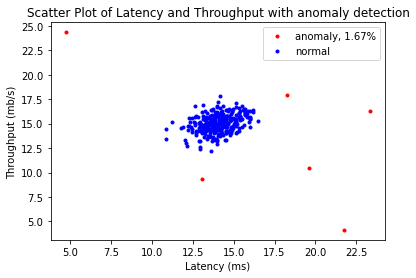

In [19]:
plt.plot(anomalies[:,0], anomalies[:,1], 'r.', label = 'anomaly, 1.67%')
plt.plot(normal[:,0], normal[:,1], 'b.', label = 'normal')
plt.legend()
plt.title("Scatter Plot of Latency and Throughput with anomaly detection")
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

## Problem 2

#### a) Load the image (128 by 128 by 3) and show the image. Reshape it to a two dimensional array with 3 columns.

(128, 128, 3)
(16384, 3)


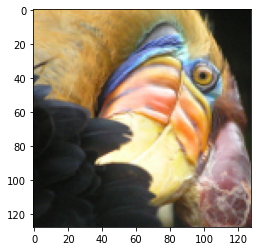

In [21]:
#Load image
image = imread("Data/bird_small.png")
#Check image dimension
print(image.shape)
#Take a look at the loaded image
plt.imshow(image)
#Reshape image to a 2D array with 3 columns
X = image.reshape(-1,3)
print(X.shape)

#### b) Apply K-Means clustering to the image data with 16 clusters and show the centroids. Set the random_state to 10.

In [22]:
#Do a k-mean with 16 clusters
kmeans = KMeans(n_clusters=16, random_state=10).fit(X)

In [23]:
#Show centroids
kmeans.cluster_centers_

array([[0.16169378, 0.16376999, 0.15570158],
       [0.8695096 , 0.71807516, 0.45645237],
       [0.5879736 , 0.5011669 , 0.44843292],
       [0.45630598, 0.38703948, 0.35551682],
       [0.9771122 , 0.94591814, 0.817235  ],
       [0.7588347 , 0.60814834, 0.3430719 ],
       [0.38695213, 0.4575404 , 0.64724624],
       [0.08392352, 0.09092882, 0.08068708],
       [0.28492087, 0.25696436, 0.25384617],
       [0.9636886 , 0.85923916, 0.63115495],
       [0.7018231 , 0.63038504, 0.563462  ],
       [0.6512483 , 0.47338122, 0.21264745],
       [0.9180642 , 0.57125574, 0.2525741 ],
       [0.56956863, 0.721349  , 0.86848617],
       [0.4634034 , 0.33326584, 0.182744  ],
       [0.8285687 , 0.7470784 , 0.7378627 ]], dtype=float32)

#### c) Now view the effects of the compression by reconstructing the image based only on the centroid assignments. Specifically, you can replace the RGB intensities at each pixel location with the mean of the centroid assigned to it.

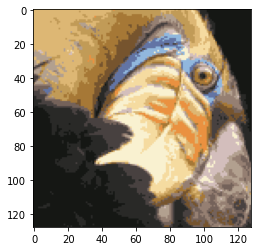

In [24]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)